# Shell Method – Solids of Revolution

---

## What is this?

This notebook demonstrates the **Cylindrical Shell Method**  
for finding the volume of a solid of revolution.

---

## Core idea

- Each vertical strip of the function is rotated around an axis to form a thin cylindrical shell.
- Instead of slicing discs perpendicular to the axis, we use shells parallel to the axis.
- The general formula is:
$
V = 2\pi \int_{a}^{b} (radius)(height) \, dx
$

---

## What we’ll do

1. Define an example function and interval $[a,b]$  
2. Use **`sympy`** to set up the integral symbolically  
3. Use **`numpy` + `matplotlib`** to visualize the shells in 3D  
4. Confirm the symbolic and numeric results match

---

## Goal

> See how the Shell Method builds volume with hollow cylinders instead of discs.


In [8]:
import numpy as np
import sympy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
x = sp.Symbol('x')
f = 1 - x**2
a, b = 0, 1


In [13]:
radius = x
high = f

shell_volume = 2*sp.pi*sp.integrate(radius*high, (x, a, b))

print("Shell Method Volume (symbolic):", shell_volume)

Shell Method Volume (symbolic): pi/2


In [14]:
def integrand(x):
    return x * (1 - x**2)

numeric_volume, _ = quad(integrand, a, b)
numeric_volume *= 2 * np.pi

print("Shell Method Volume (numeric):", numeric_volume)

Shell Method Volume (numeric): 1.5707963267948966


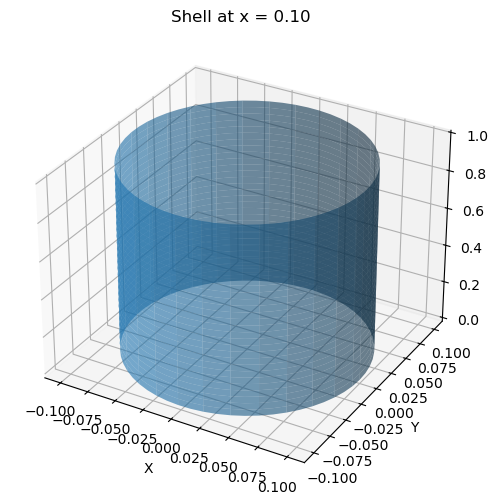

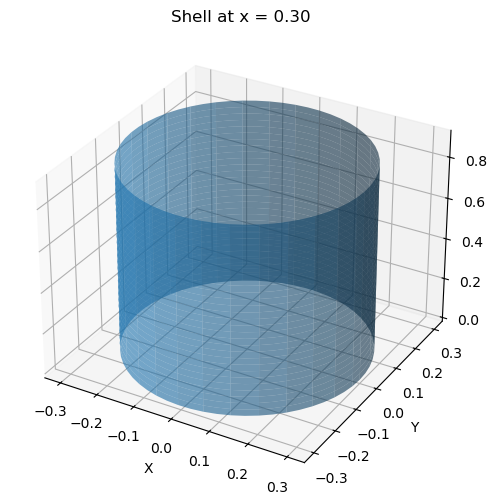

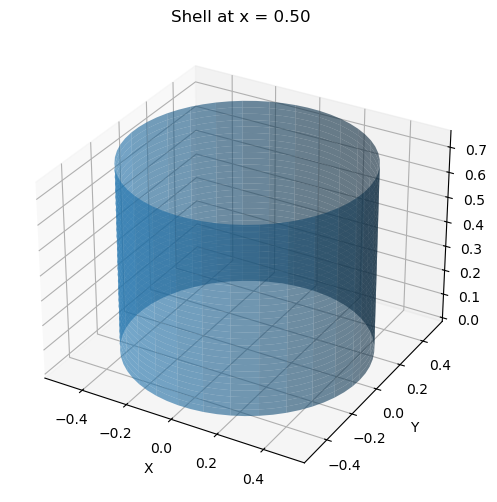

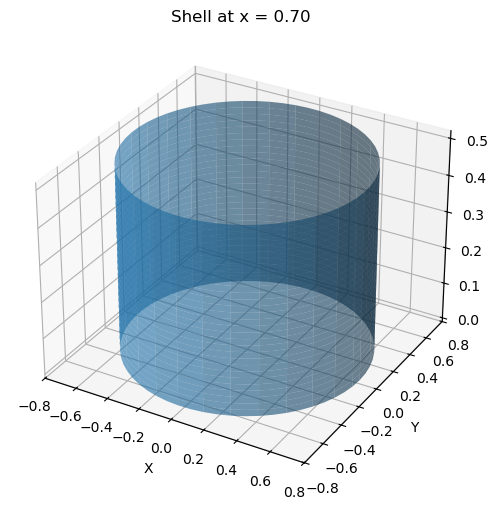

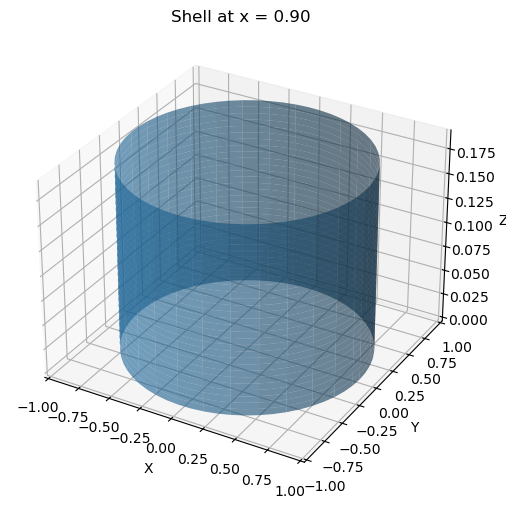

In [15]:
num_shells = 5

theta = np.linspace(0, 2*np.pi, 60)
for i in range(num_shells):

    xi = a + (i + 0.5) * (b - a) / num_shells
    ri = xi
    hi = float(f.subs(x, xi))

    Theta, Z = np.meshgrid(theta, np.linspace(0, hi, 30))
    X = ri * np.cos(Theta)
    Y = ri * np.sin(Theta)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, alpha=0.6)
    ax.set_title(f"Shell at x = {xi:.2f}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


# Interpretation – Solid of Revolution (Shell Method)

## What does this figure represent?

This visualization illustrates the **Cylindrical Shell Method**  
for finding the volume of a solid of revolution.

Instead of slicing the region perpendicular to the axis (like the Disc/Washer Method),  
the Shell Method slices the region **parallel to the axis** to create thin hollow cylinders.

---

## Geometric intuition

- Each **vertical strip** is rotated around the axis to form a **thin cylindrical shell**.
- The **radius** of each shell is the distance from the strip to the axis of rotation.
- The **height** of each shell is determined by the function value at that x.
- The **thickness** of each shell is an infinitesimally small dx.

---

## Volume formula

The volume is obtained by summing up the volumes of all the thin shells:
$
V = 2\pi \int_{a}^{b} (\text{radius}) \times (\text{height}) \, dx.
$

- The factor $2\pi$ comes from the circumference of each shell.
- The product $\text{radius} \times \text{height}$ represents the lateral surface area of each shell.
- Multiplying by $dx$ gives the volume of a single shell.

---

## Why use the Shell Method?

- It is particularly useful when rotating **around an axis that is parallel to the strip direction**.
- Sometimes the Shell Method is algebraically simpler than the Disc/Washer Method,  
  especially when the function is given in terms of x and the axis of rotation is vertical.

---

## Key takeaway

> The Shell Method shows how the volume of a solid of revolution can be understood  
> as the sum of many thin hollow cylinders stacked together.
> It complements the Disc/Washer Method by offering a different slicing perspective  
> that can make certain problems much easier to solve.
